In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:

single_image= X_train[0]

In [6]:
single_image.shape

(28, 28)

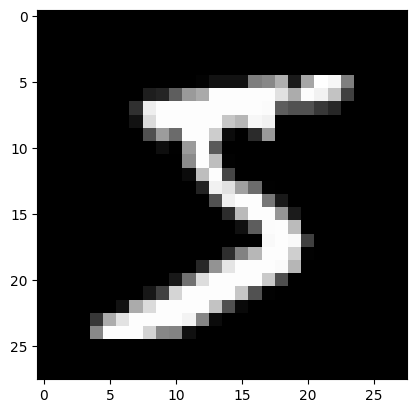

In [7]:
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
X_train.min()

0

In [10]:

X_train.max()

255

In [11]:

X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
X_train_scaled.min()


X_train_scaled.max()

1.0

In [13]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [14]:
type(y_train_onehot)

numpy.ndarray

In [15]:
y_train_onehot.shape

(60000, 10)

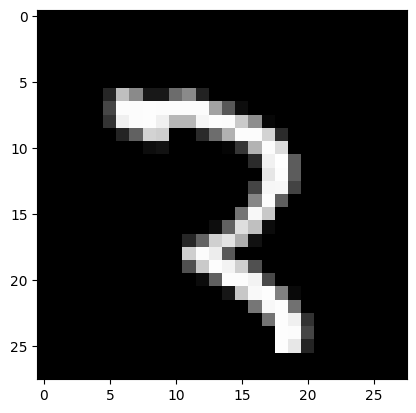

In [16]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [17]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [18]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [25]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(16,activation='tanh'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [26]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 128)       0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 21632)             0         
                                                                 
 dense_9 (Dense)             (None, 16)                346128    
                                                                 
 dense_10 (Dense)            (None, 32)                544       
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                      

In [32]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')


In [34]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 66s 70ms/step - loss: 0.0291 - accuracy: 0.9915 - val_loss: 0.0525 - val_accuracy: 0.9848
Epoch 2/5
938/938 [==============================] - 67s 71ms/step - loss: 0.0206 - accuracy: 0.9937 - val_loss: 0.0604 - val_accuracy: 0.9825
Epoch 3/5
938/938 [==============================] - 67s 71ms/step - loss: 0.0141 - accuracy: 0.9959 - val_loss: 0.0561 - val_accuracy: 0.9849
Epoch 4/5
938/938 [==============================] - 67s 71ms/step - loss: 0.0125 - accuracy: 0.9962 - val_loss: 0.0561 - val_accuracy: 0.9856
Epoch 5/5
938/938 [==============================] - 64s 68ms/step - loss: 0.0096 - accuracy: 0.9970 - val_loss: 0.0562 - val_accuracy: 0.9859


In [35]:
metrics = pd.DataFrame(model.history.history)

In [36]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.029126,0.991450,0.052534,0.9848
1,0.020598,0.993700,0.060377,0.9825
2,0.014129,0.995867,0.056115,0.9849
3,0.012520,0.996233,0.056103,0.9856
4,0.009626,0.997050,0.056178,0.9859


<Axes: >

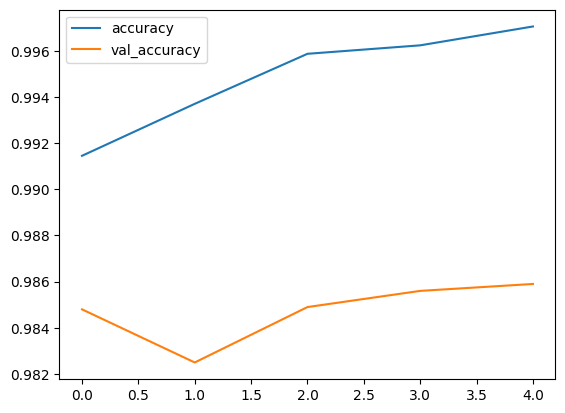

In [37]:

metrics[['accuracy','val_accuracy']].plot()

<Axes: >

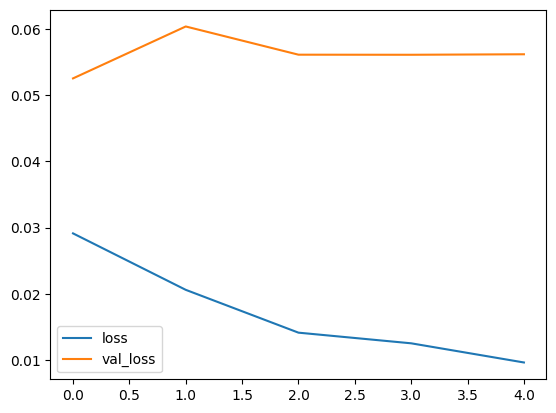

In [38]:
metrics[['loss','val_loss']].plot()

In [39]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 3s 8ms/step


In [40]:

print(confusion_matrix(y_test,x_test_predictions))

[[ 975    0    2    1    0    0    2    0    0    0]
 [   1 1125    4    2    0    0    2    1    0    0]
 [   1    0 1019    2    1    0    1    6    1    1]
 [   0    0    4  999    0    3    0    3    1    0]
 [   0    0    2    0  969    0    1    1    0    9]
 [   1    0    0    6    0  881    2    1    1    0]
 [   5    3    0    0    1    2  945    0    2    0]
 [   0    2   10    0    1    0    0 1013    1    1]
 [   3    0    6    3    2    2    3    3  943    9]
 [   2    0    1    1    3    3    0    8    1  990]]


In [41]:

print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [43]:
img = image.load_img('l1.jpeg')
type(img)
img = image.load_img('l1.jpeg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [44]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)


1/1 [==============================] - 0s 95ms/step


In [45]:
print(x_single_prediction)

[5]


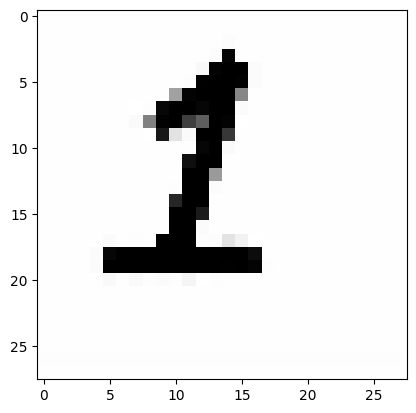

In [46]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [47]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [49]:
  x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 87ms/step


In [50]:
print(x_single_prediction)

[3]
